**Importing Libraries**

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

#plotly

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats
from collections import Counter

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)


In [2]:
df = pd.read_csv("/content/Home Loan Data.csv")

In [3]:
df

,ID,LocationCode,Minority,Medianincome,Annualincome,IncomeRatio,FirstTimeBuyer,Age,DebttoIncomeRatio,HomeValue,Borrowed,LTVratio,Length,InterestRate
0,1,53,29.57,91700,123000,1.34,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.00,2,< 25,30,535000,505000,95.00,360,3.50
2,3,34,64.19,96500,64000,0.66,2,< 25,43,375000,105000,28.55,180,2.50
3,4,51,34.58,124900,141000,1.13,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.29,1,< 25,30,405000,325000,80.00,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,37,40.28,80100,275000,3.43,2,> 74,20,755000,505000,90.00,360,2.62
496,497,8,14.48,100000,79000,0.79,2,> 74,20,425000,315000,73.85,360,3.00
497,498,17,10.96,69300,187000,2.70,2,> 74,10,325000,145000,43.75,180,2.87
498,499,26,33.82,79700,109000,1.37,2,> 74,20,525000,385000,73.46,360,3.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 500 non-null    int64  
 1   LocationCode       500 non-null    int64  
 2   Minority           500 non-null    float64
 3   Medianincome       500 non-null    int64  
 4   Annualincome       500 non-null    int64  
 5   IncomeRatio        500 non-null    float64
 6   FirstTimeBuyer     500 non-null    int64  
 7   Age                500 non-null    object 
 8   DebttoIncomeRatio  500 non-null    int64  
 9   HomeValue          500 non-null    int64  
 10  Borrowed           500 non-null    int64  
 11  LTVratio           500 non-null    float64
 12  Length             500 non-null    int64  
 13  InterestRate       500 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 54.8+ KB


In [5]:
df.describe()

,ID,LocationCode,Minority,Medianincome,Annualincome,IncomeRatio,FirstTimeBuyer,DebttoIncomeRatio,HomeValue,Borrowed,LTVratio,Length,InterestRate
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,25.47,28.32,85300.20,127626.00,1.53,1.89,30.30,434760.00,286080.00,70.69,322.92,3.24
std,144.48,16.55,23.67,15779.26,105177.42,1.37,0.32,12.07,253340.69,139004.60,16.77,70.25,0.55
min,1.00,1.00,1.49,52300.00,18000.00,0.21,1.00,10.00,35000.00,25000.00,12.06,120.00,1.87
25%,125.75,8.00,10.47,74875.00,69750.00,0.84,2.00,20.00,265000.00,185000.00,60.00,360.00,2.87
50%,250.50,25.00,19.66,83300.00,105500.00,1.23,2.00,30.00,360000.00,265000.00,74.30,360.00,3.12
75%,375.25,39.25,39.59,95450.00,155250.00,1.88,2.00,41.00,555000.00,375000.00,80.00,360.00,3.50
max,500.00,55.00,98.95,139800.00,1560000.00,22.07,2.00,50.00,1915000.00,765000.00,97.00,360.00,6.00


In [6]:
df.columns

Index(['ID', 'LocationCode', 'Minority', 'Medianincome', 'Annualincome', 'IncomeRatio', 'FirstTimeBuyer', 'Age', 'DebttoIncomeRatio', 'HomeValue', 'Borrowed', 'LTVratio', 'Length', 'InterestRate'], dtype='object')

In [7]:
le = LabelEncoder()
df['FirstTimeBuyer'] = le.fit_transform(df['FirstTimeBuyer'])
df['Minority'] = le.fit_transform(df['Minority'])

In [8]:
df.groupby("LocationCode")[["Annualincome","HomeValue"]].mean().head()

,Annualincome,HomeValue
LocationCode,,
1,130166.67,428333.33
2,66000.00,315000.00
4,98937.50,381250.00
5,127428.57,269285.71
6,152437.50,676000.00


In [9]:
df.groupby("Age")[["Annualincome","HomeValue"]].mean()

,Annualincome,HomeValue
Age,,
25 to 34,140080.00,447600.00
35 to 44,129525.18,468021.58
45 to 54,108484.54,399329.90
55 to 64,134534.09,429204.55
65 to 74,108366.67,380166.67
< 25,167297.87,463085.11
> 74,109368.42,466578.95


In [10]:
df.groupby("FirstTimeBuyer")[["Annualincome","HomeValue"]].mean()

,Annualincome,HomeValue
FirstTimeBuyer,,
0,97428.57,324285.71
1,131434.68,448693.69


**Data Visualization**

Univariate Data Exploration

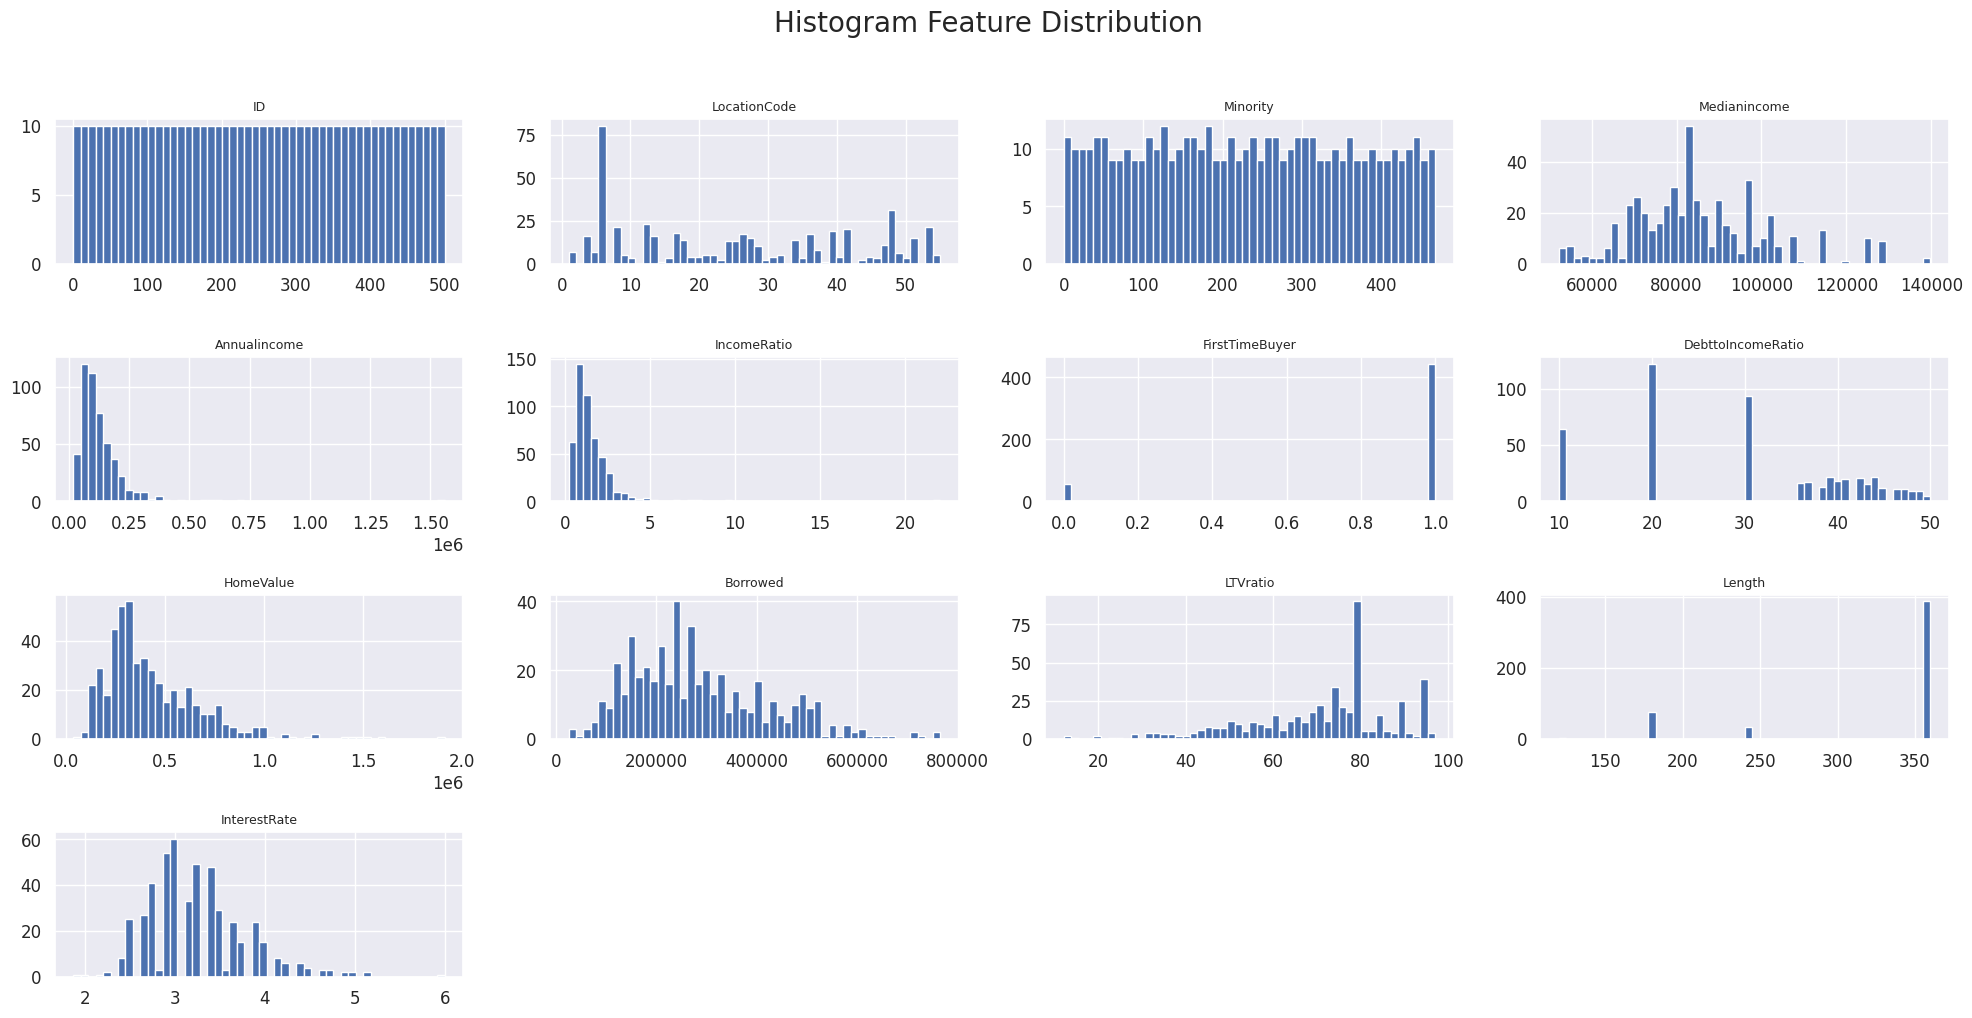

In [11]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

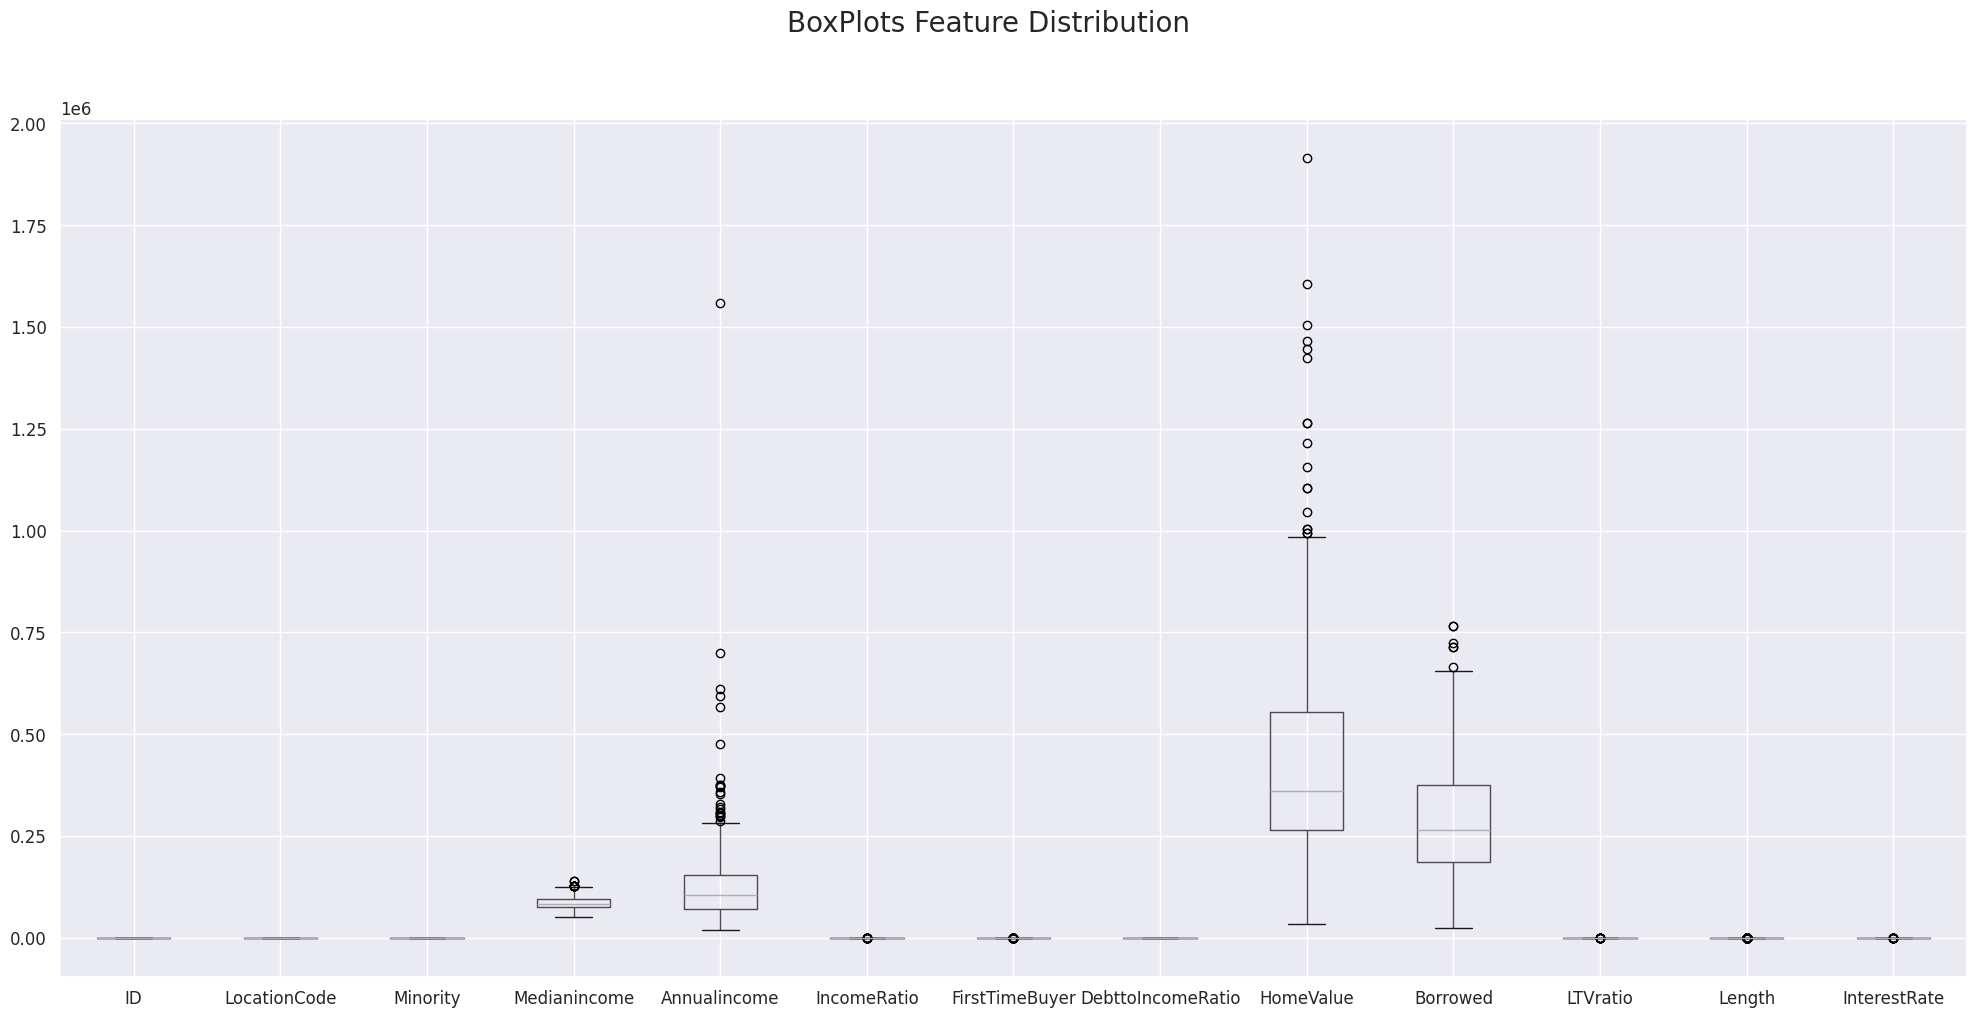

In [12]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

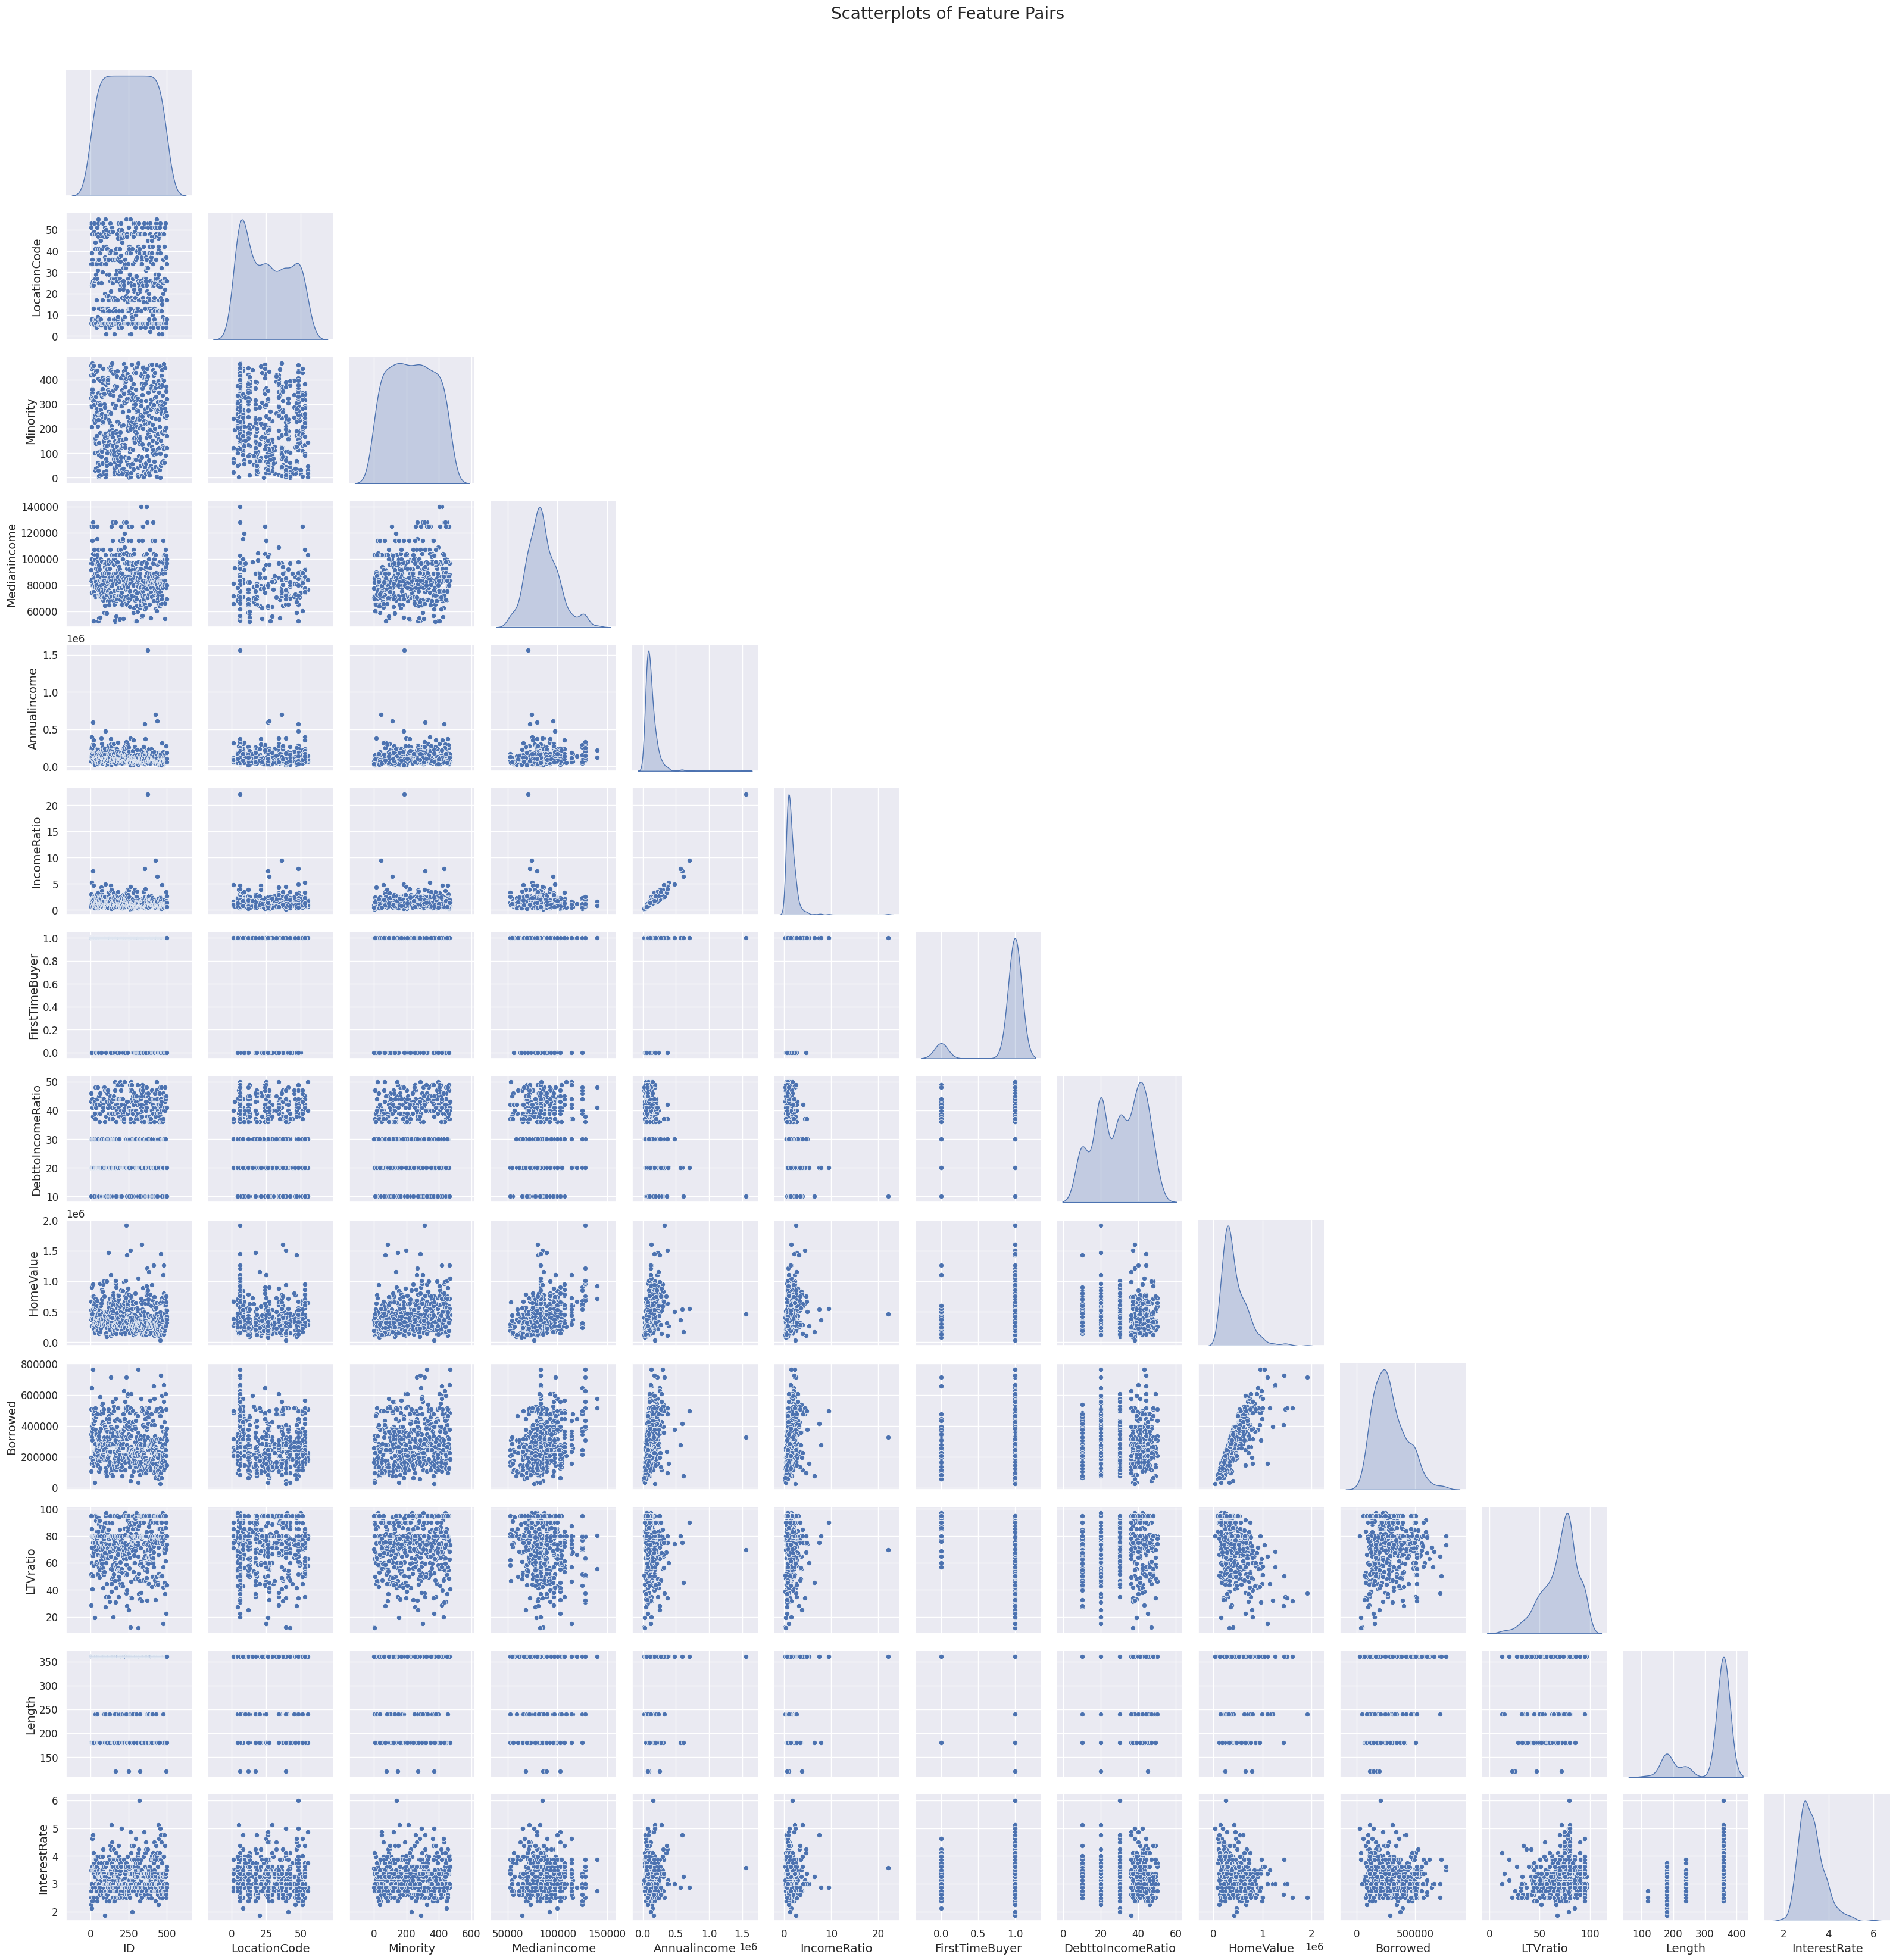

In [13]:
sns.pairplot(df, diag_kind='kde', corner=True)  # 'diag_kind' adds KDE to the diagonal; 'corner' avoids redundant plots
plt.suptitle('Scatterplots of Feature Pairs', x=0.5, y=1.02, ha='center', fontsize=20)

plt.show()

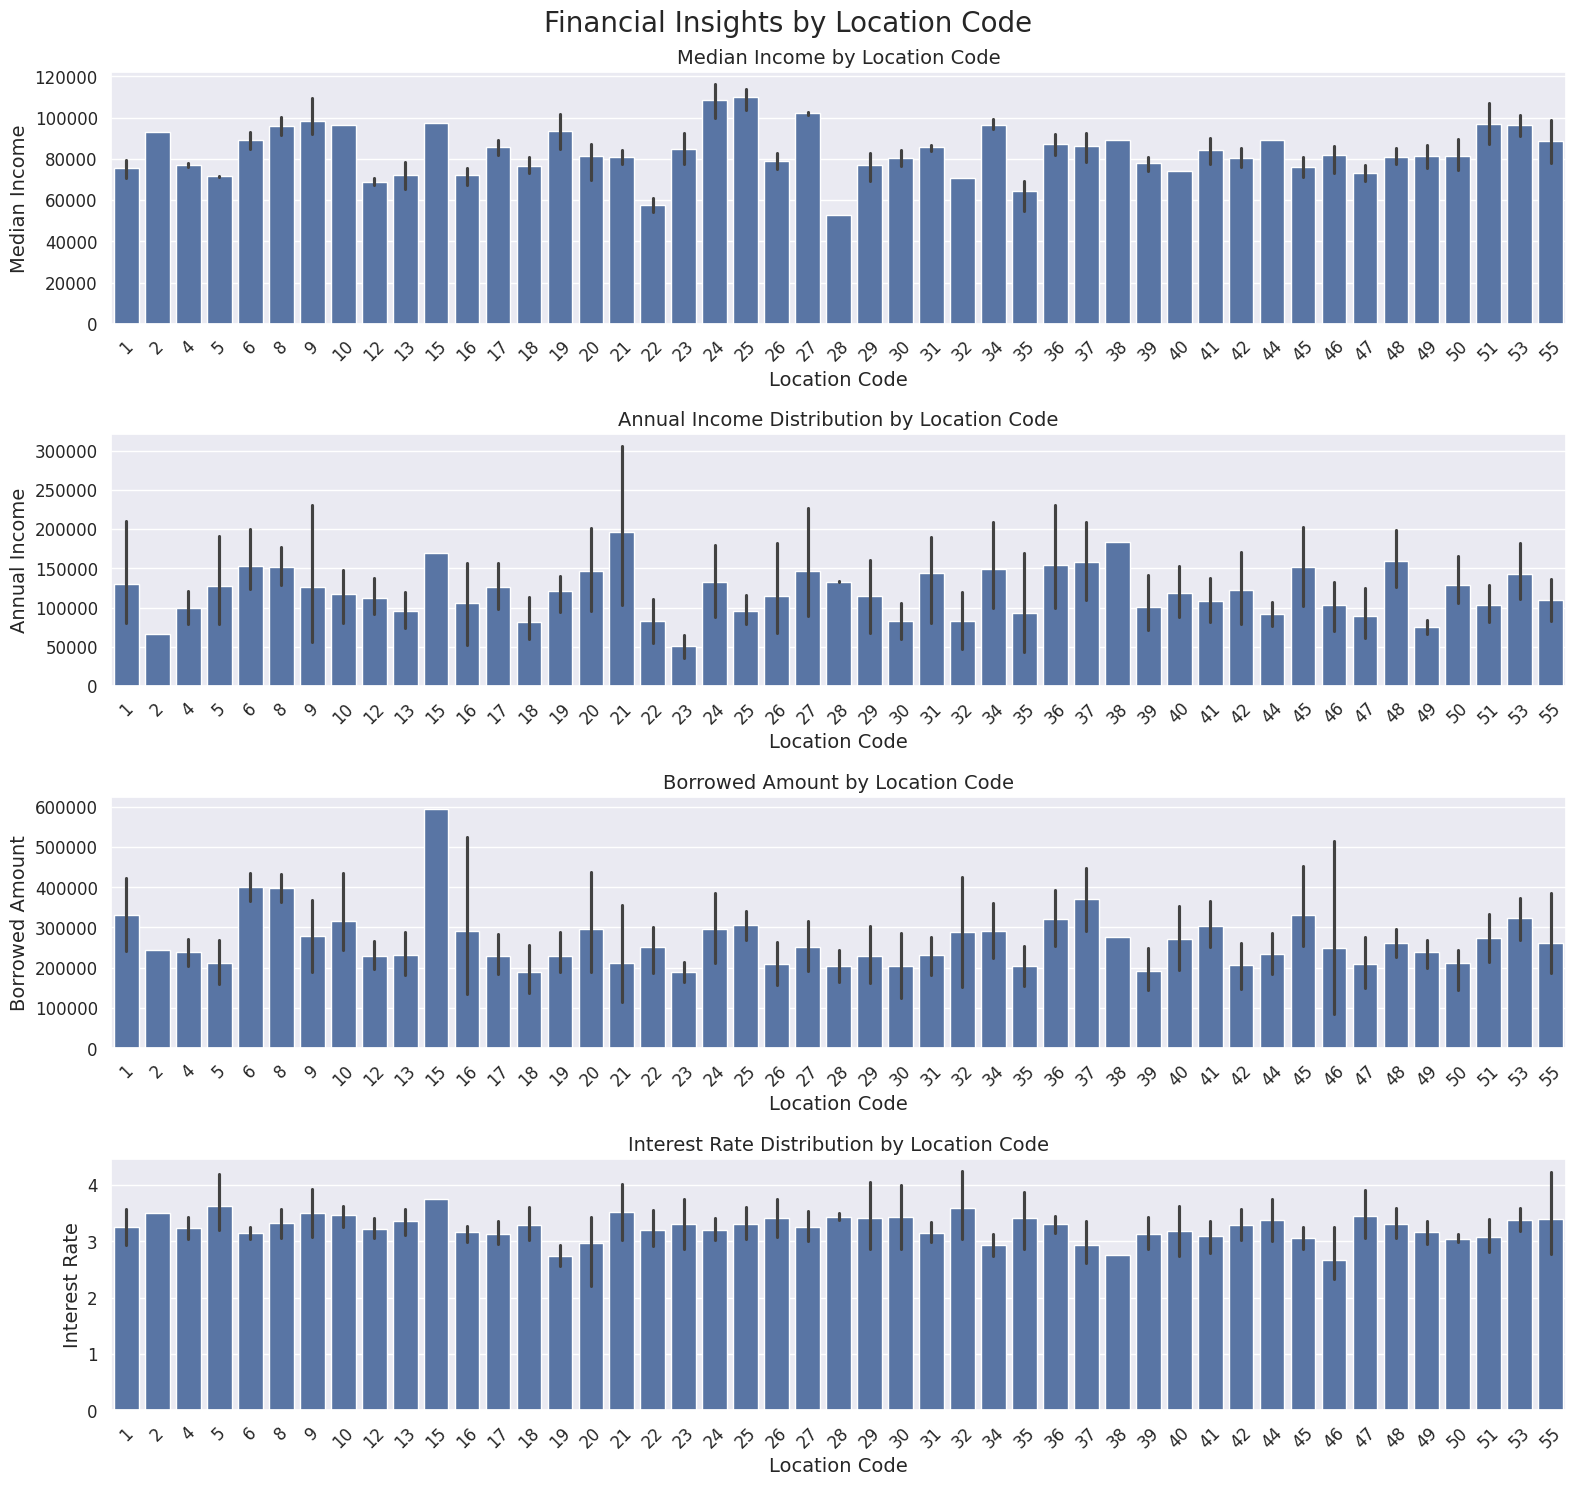

In [14]:
fig, ax = plt.subplots(4, 1, sharex=False, figsize=(16, 16))
fig.suptitle('Financial Insights by Location Code', fontsize=20, y=0.93)  # Adjust the main title position

# Barplot 1
sns.barplot(x="LocationCode", y="Medianincome", data=df, ax=ax[0])
ax[0].set_title('Median Income by Location Code', fontsize=14)
ax[0].set_xlabel("Location Code")
ax[0].set_ylabel("Median Income")
ax[0].tick_params(axis='x', rotation=45)

# Barplot 2
sns.barplot(x="LocationCode", y="Annualincome", data=df, ax=ax[1])
ax[1].set_title('Annual Income Distribution by Location Code', fontsize=14)
ax[1].set_xlabel("Location Code")
ax[1].set_ylabel("Annual Income")
ax[1].tick_params(axis='x', rotation=45)

# Barplot 3
sns.barplot(x="LocationCode", y="Borrowed", data=df, ax=ax[2])
ax[2].set_title('Borrowed Amount by Location Code', fontsize=14)
ax[2].set_xlabel("Location Code")
ax[2].set_ylabel("Borrowed Amount")
ax[2].tick_params(axis='x', rotation=45)

# Barplot 4
sns.barplot(x="LocationCode", y="InterestRate", data=df, ax=ax[3])
ax[3].set_title('Interest Rate Distribution by Location Code', fontsize=14)
ax[3].set_xlabel("Location Code")
ax[3].set_ylabel("Interest Rate")
ax[3].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for the suptitle
plt.show()


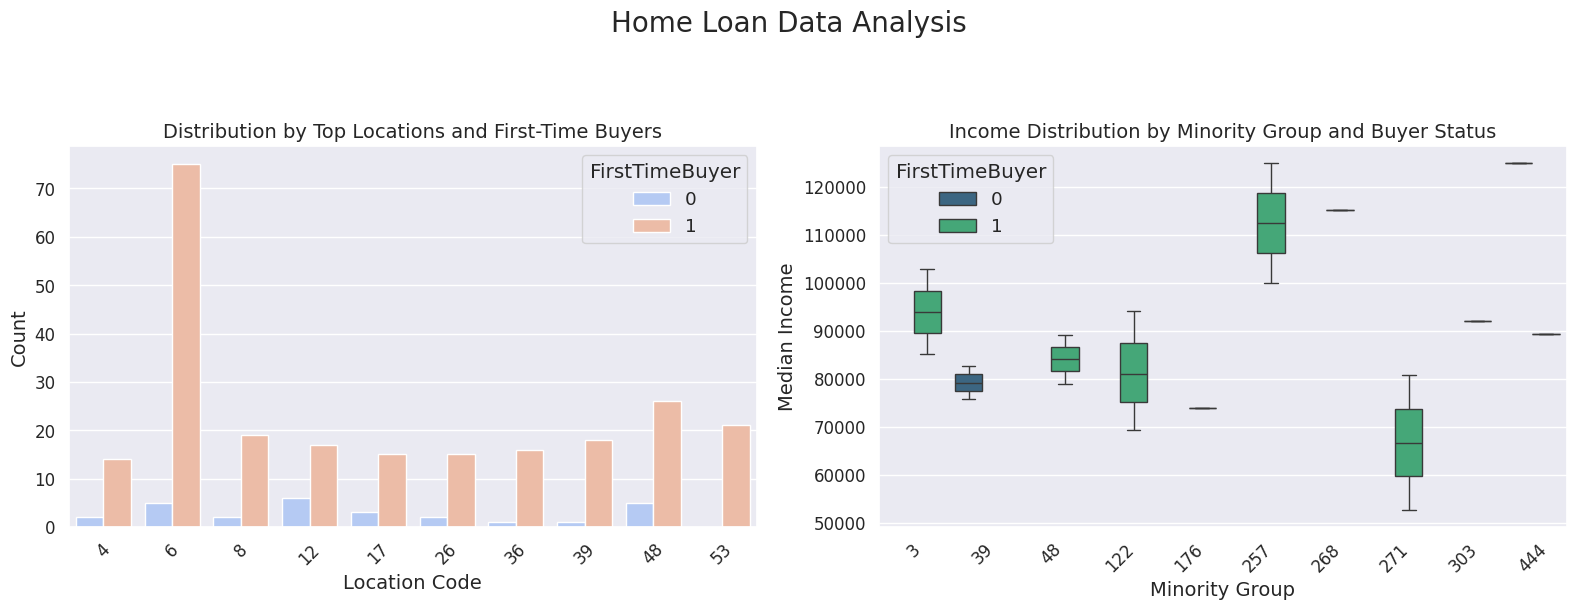

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Home Loan Data Analysis', fontsize=20, y=1.02)

# Plot 1: Countplot for LocationCode
top_locations = df['LocationCode'].value_counts().head(10).index  # Top 10 locations
sns.countplot(
    x="LocationCode",
    data=df[df['LocationCode'].isin(top_locations)],
    hue="FirstTimeBuyer",
    ax=ax[0],
    palette="coolwarm"
)
ax[0].set_title('Distribution by Top Locations and First-Time Buyers', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel("Location Code")
ax[0].set_ylabel("Count")

# Plot 2: Boxplot for Medianincome by Minority
sns.boxplot(
    x="Minority",
    y="Medianincome",
    hue="FirstTimeBuyer",
    data=df[df['Minority'].isin(df['Minority'].value_counts().head(10).index)],  # Top 10 Minority categories
    ax=ax[1],
    palette="viridis"
)
ax[1].set_title('Income Distribution by Minority Group and Buyer Status', fontsize=14)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel("Minority Group")
ax[1].set_ylabel("Median Income")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
plt.show()



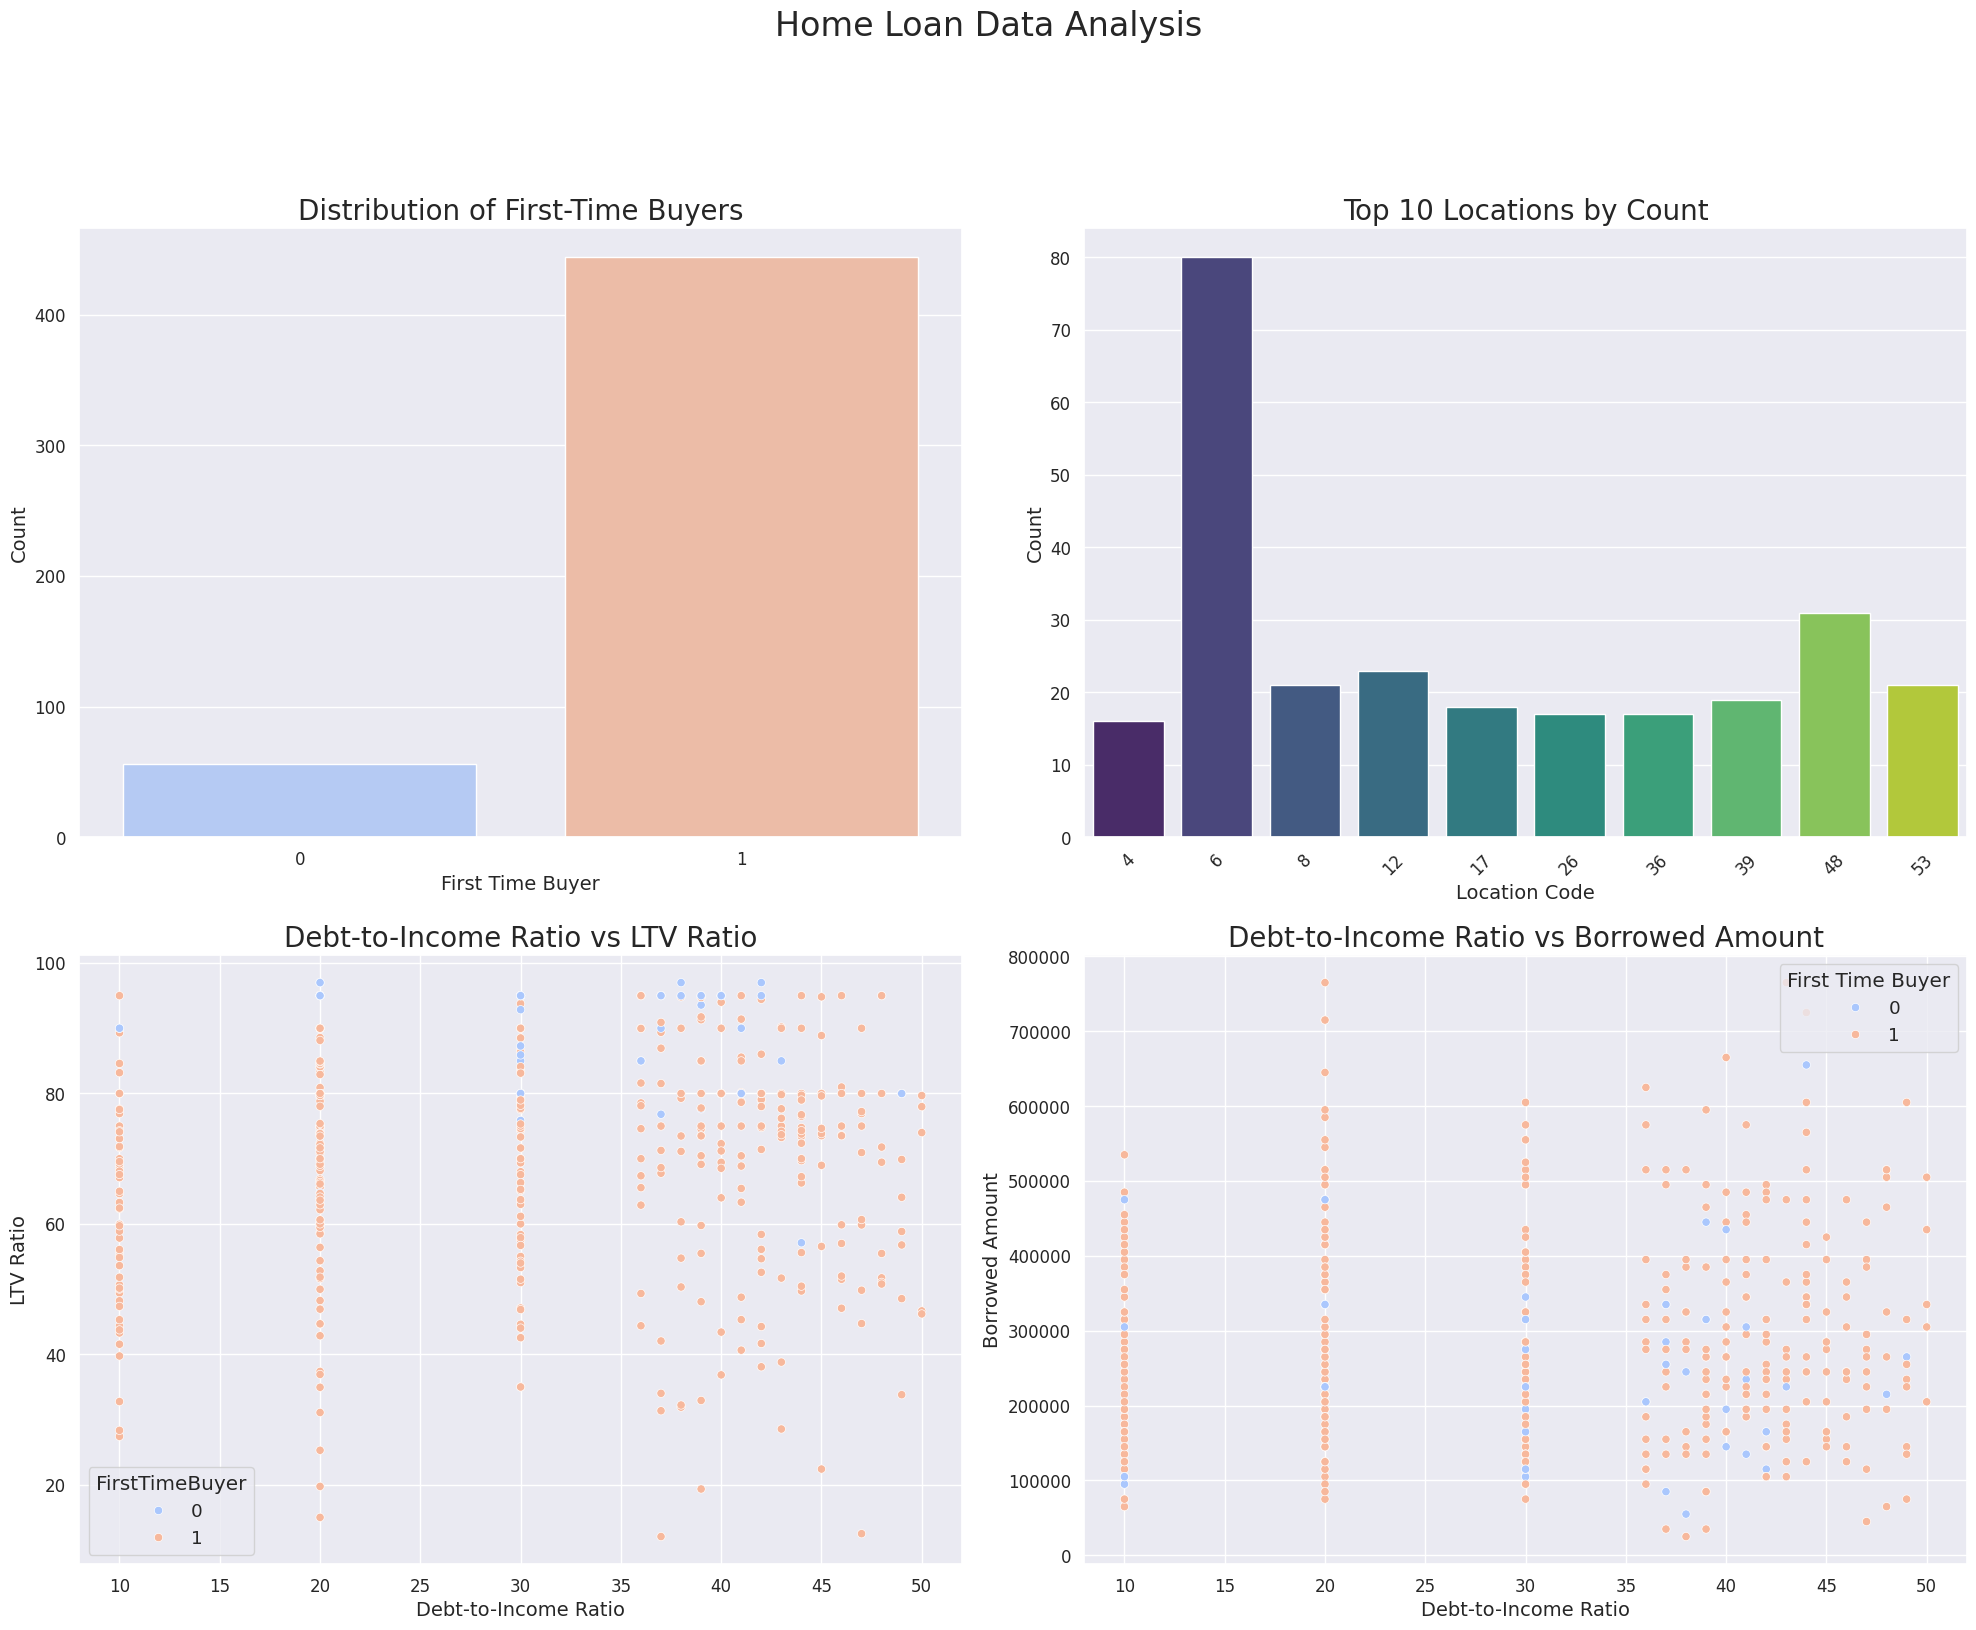

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, figsize=(20, 16))
fig.suptitle('Home Loan Data Analysis', fontsize=24, y=1.02)

# Plot 1: Distribution of First-Time Buyers
sns.countplot(x="FirstTimeBuyer", data=df, ax=ax1, palette="coolwarm")
ax1.set_title('Distribution of First-Time Buyers', size=20)
ax1.set_xlabel("First Time Buyer", fontsize=14)
ax1.set_ylabel("Count", fontsize=14)

# Plot 2: Distribution by Location Code
top_locations = df['LocationCode'].value_counts().head(10).index  # Top 10 locations
sns.countplot(x="LocationCode", data=df[df['LocationCode'].isin(top_locations)], ax=ax2, palette="viridis")
ax2.set_title('Top 10 Locations by Count', size=20)
ax2.tick_params(axis='x', rotation=45)
ax2.set_xlabel("Location Code", fontsize=14)
ax2.set_ylabel("Count", fontsize=14)

# Plot 3: Debt-to-Income Ratio vs Loan-to-Value Ratio (LTV)
sns.scatterplot(x="DebttoIncomeRatio", y="LTVratio", data=df, hue="FirstTimeBuyer", palette="coolwarm", ax=ax3)
ax3.set_title('Debt-to-Income Ratio vs LTV Ratio', size=20)
ax3.set_xlabel("Debt-to-Income Ratio", fontsize=14)
ax3.set_ylabel("LTV Ratio", fontsize=14)

# Plot 4: Debt-to-Income Ratio vs Borrowed Amount
sns.scatterplot(x="DebttoIncomeRatio", y="Borrowed", data=df, ax=ax4, hue="FirstTimeBuyer", palette="coolwarm")
ax4.set_title('Debt-to-Income Ratio vs Borrowed Amount', size=20)
ax4.set_xlabel("Debt-to-Income Ratio", fontsize=14)
ax4.set_ylabel("Borrowed Amount", fontsize=14)
ax4.legend(title="First Time Buyer", loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for the main title
plt.show()


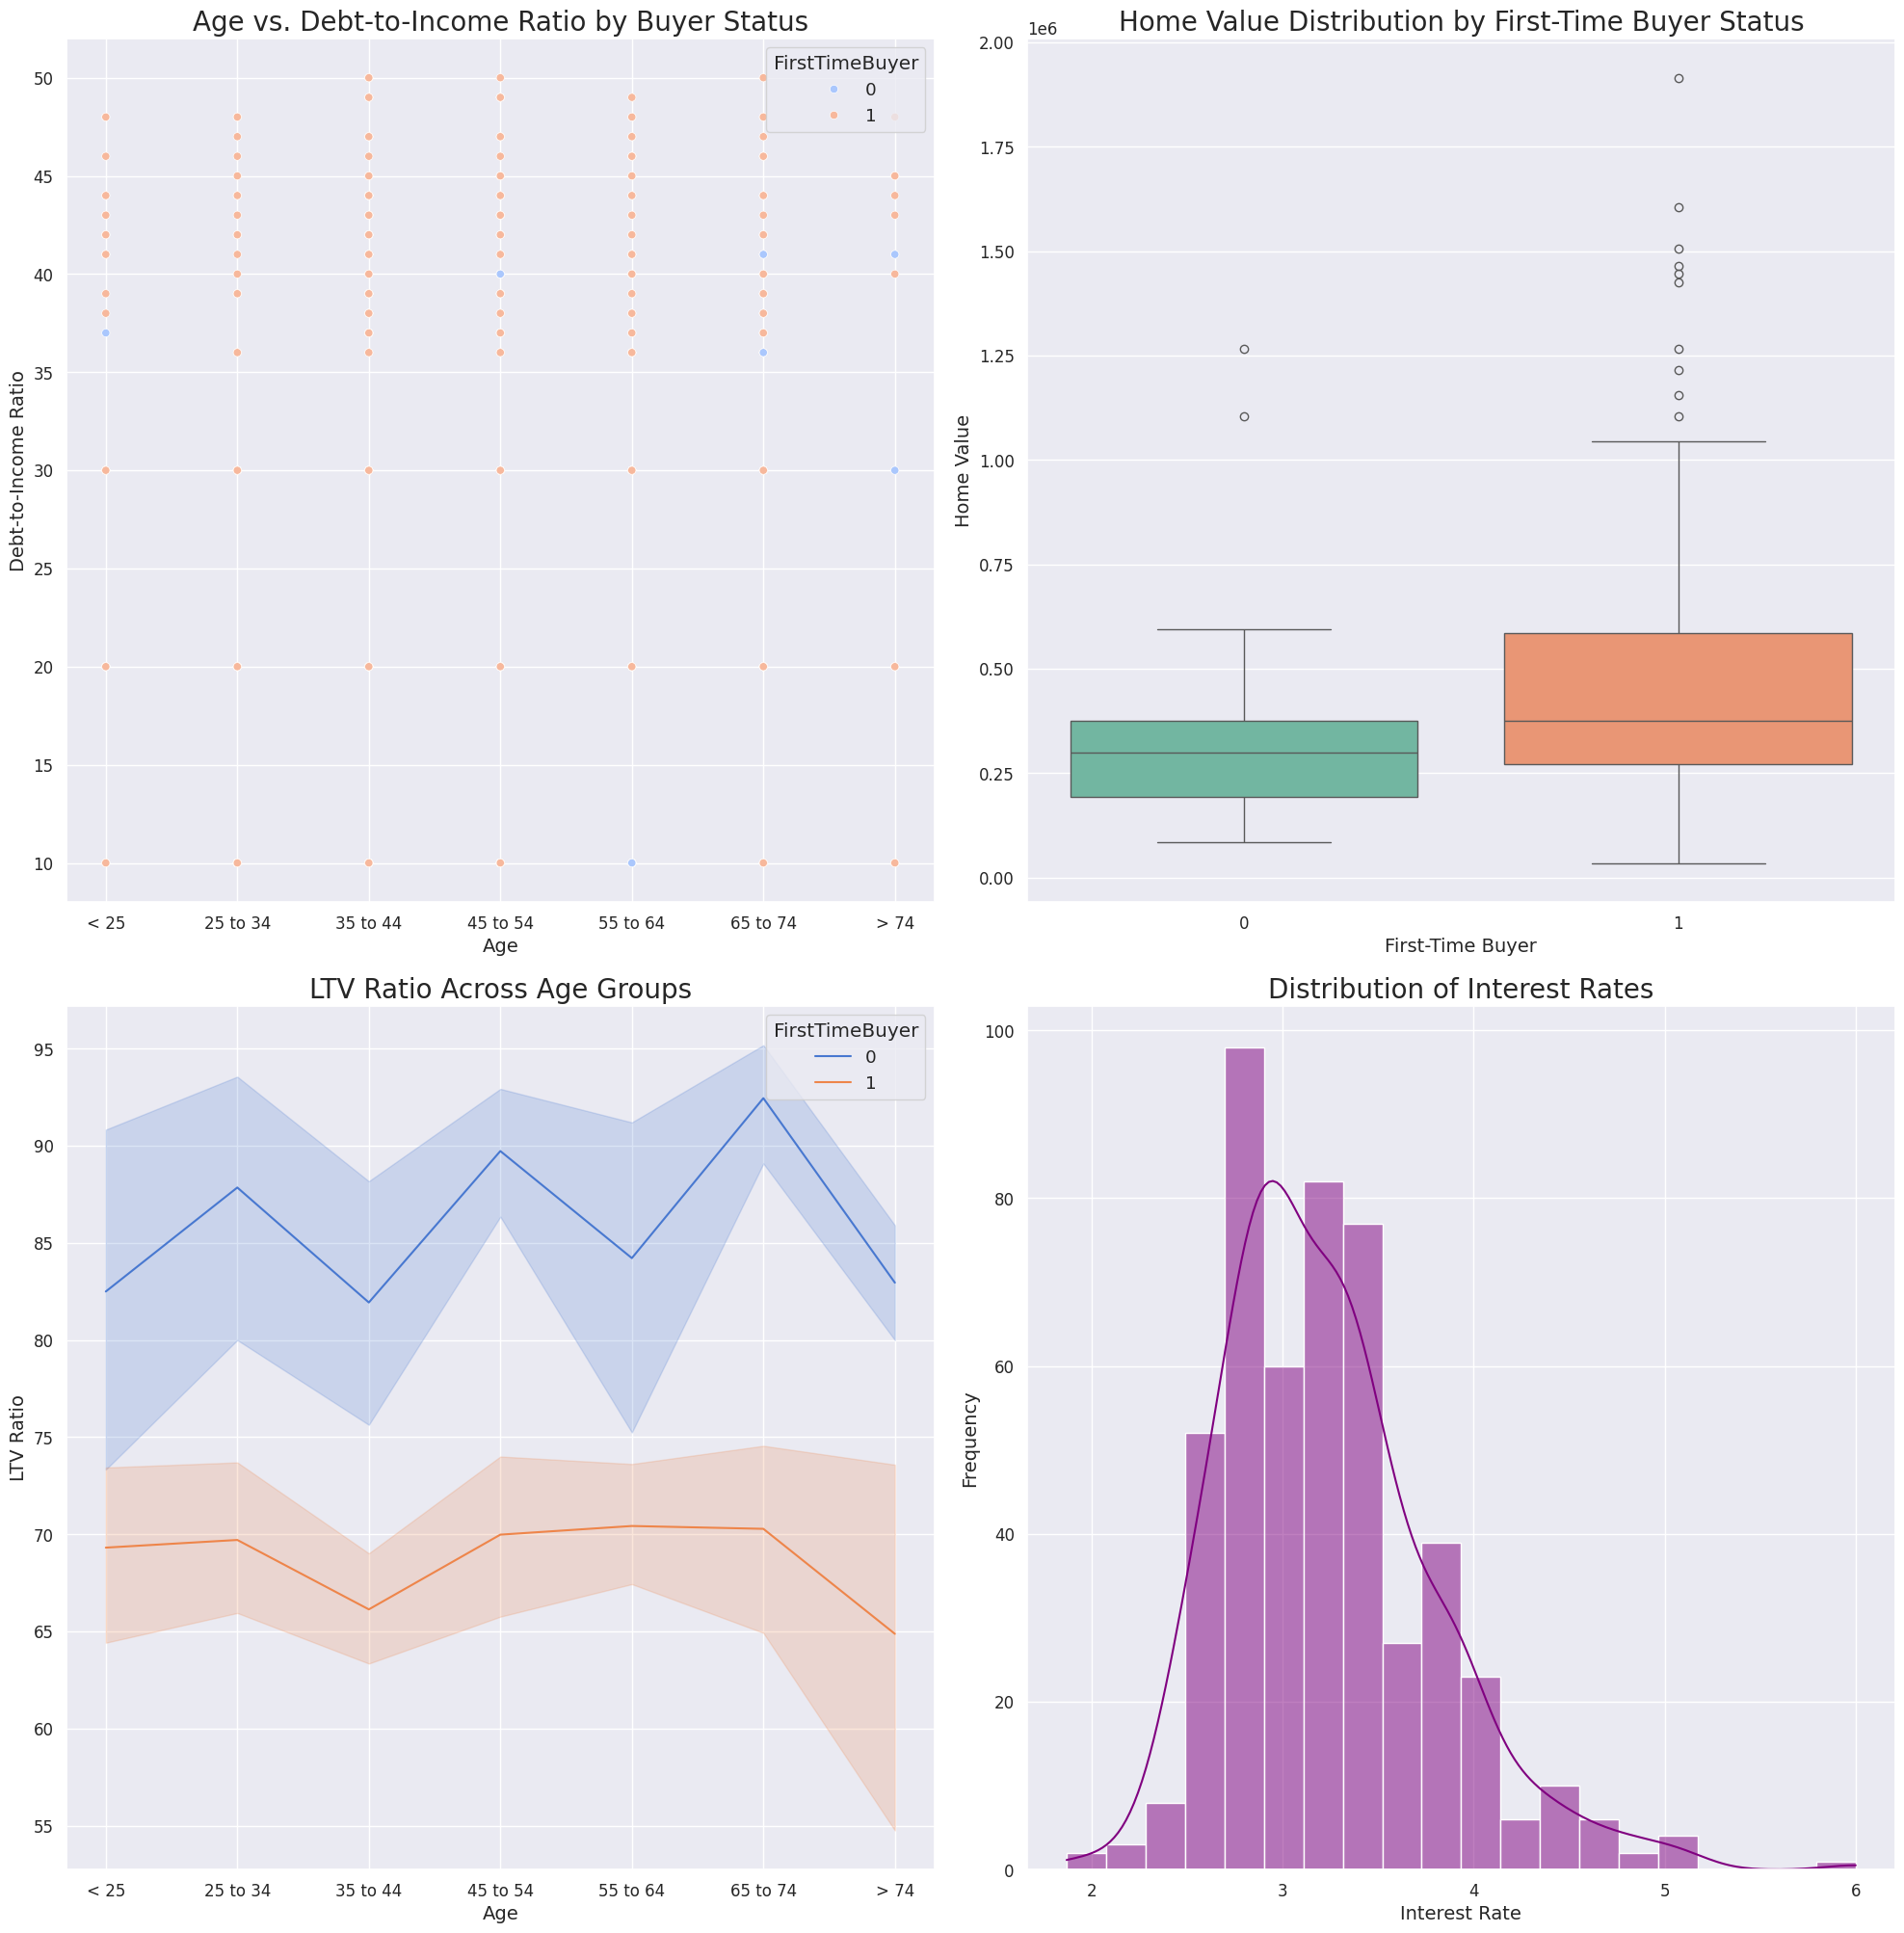

In [17]:
fig = plt.figure(figsize=(20, 40))

# 3rd Plot: Scatter Plot (Age vs. Debt-to-Income Ratio by First-Time Buyer)
plt.subplot(4, 2, 1)
plt.title("Age vs. Debt-to-Income Ratio by Buyer Status", size=20)
sns.scatterplot(x='Age', y='DebttoIncomeRatio', data=df, hue='FirstTimeBuyer', palette='coolwarm')
plt.xlabel("Age")
plt.ylabel("Debt-to-Income Ratio")

# 4th Plot: Box Plot (Home Value Distribution by First-Time Buyer)
plt.subplot(4, 2, 2)
plt.title("Home Value Distribution by First-Time Buyer Status", size=20)
sns.boxplot(x='FirstTimeBuyer', y='HomeValue', data=df, palette='Set2')
plt.xlabel("First-Time Buyer")
plt.ylabel("Home Value")

# 5th Plot: Line Plot (LTV Ratio Across Age Groups)
plt.subplot(4, 2, 3)
plt.title("LTV Ratio Across Age Groups", size=20)
sns.lineplot(x='Age', y='LTVratio', data=df, hue='FirstTimeBuyer', palette='muted')
plt.xlabel("Age")
plt.ylabel("LTV Ratio")


# 7th Plot: Histogram (Distribution of Interest Rates)
plt.subplot(4, 2, 4)
plt.title("Distribution of Interest Rates", size=20)
sns.histplot(df['InterestRate'], kde=True, bins=20, color='purple')
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")


plt.tight_layout()
plt.show()


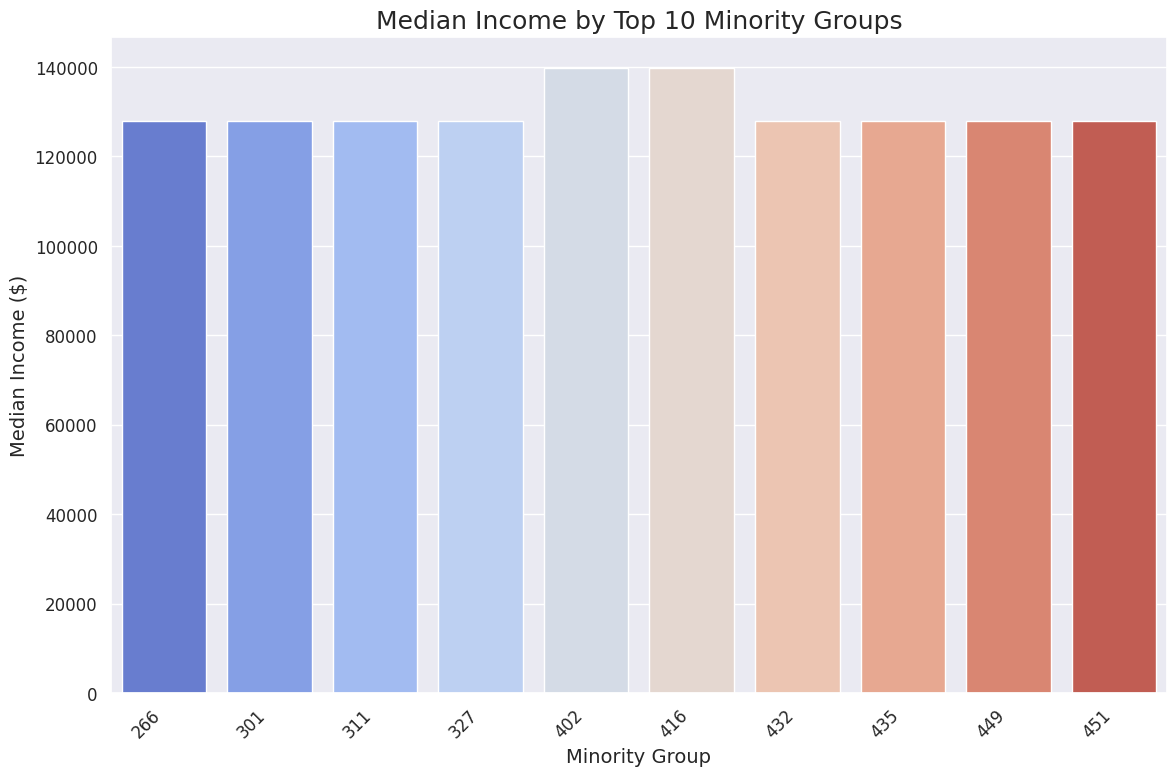

In [18]:
# Get the top 10 minority groups based on Median Income
top_minority_groups = df.groupby('Minority')['Medianincome'].mean().nlargest(10).index

# Filter the data for the top minority groups
filtered_df = df[df['Minority'].isin(top_minority_groups)]

plt.figure(figsize=(12, 8))
sns.barplot(x='Minority', y='Medianincome', data=filtered_df, palette='coolwarm')
plt.title('Median Income by Top 10 Minority Groups', fontsize=18)
plt.xlabel('Minority Group', fontsize=14)
plt.ylabel('Median Income ($)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # 'ha' is horizontal alignment

plt.tight_layout()
plt.show()


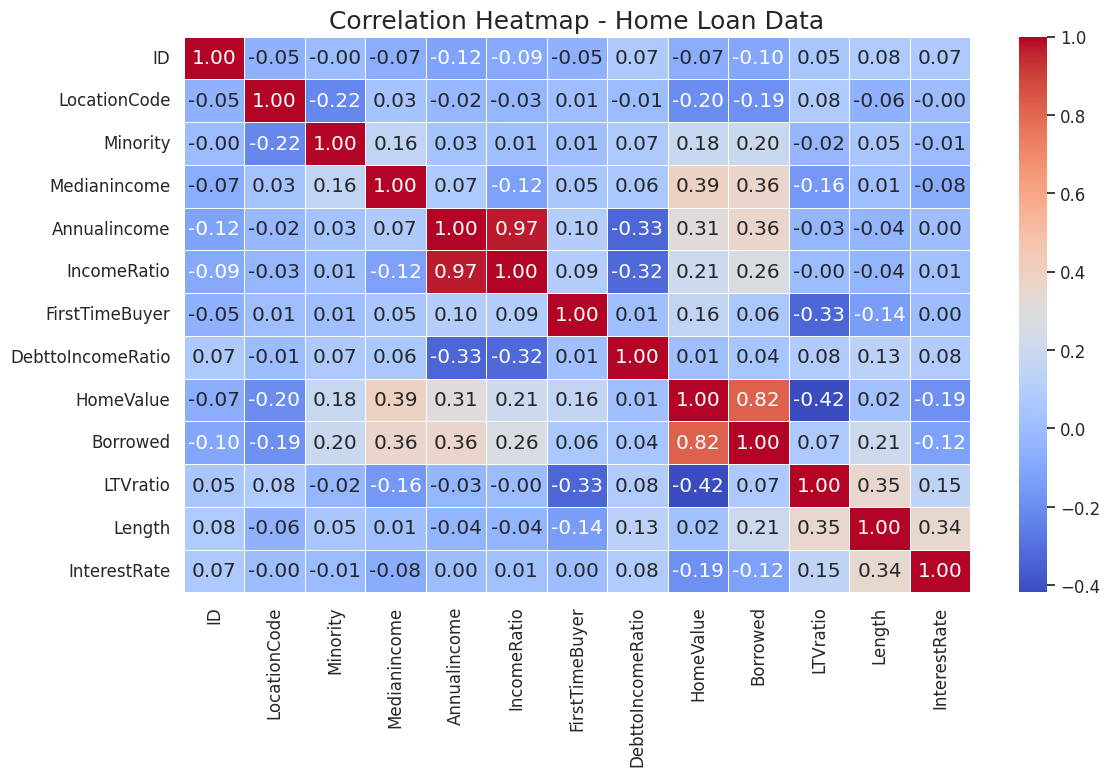

In [19]:
# Final Heatmap for Correlation
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - Home Loan Data', fontsize=18)
plt.tight_layout()
plt.show()

